In [11]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # This line was commented out, causing the error. Uncomment it to import Basemap
import numpy as np
import pandas as pd
import matplotlib
import sklearn
from sklearn_pandas import DataFrameMapper
from functools import partial
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_csv('/content/drive/MyDrive/Project/Dataset/edata.csv')
del df['Region']
df = df.iloc[::-1]

In [10]:
df

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Timestamp
999,2025,2,11,12:23:01,38.7965,-122.7837,3.5,0.5,1739276581
998,2025,2,11,12:23:02,44.1947,-115.1070,7.5,1.8,1739276582
997,2025,2,11,12:30:17,61.1500,-152.4312,1.2,0.8,1739277017
996,2025,2,11,12:34:12,36.6190,25.5275,10.0,4.4,1739277252
995,2025,2,11,12:38:57,18.0357,-66.8668,11.2,2.0,1739277537
...,...,...,...,...,...,...,...,...,...
4,2025,2,15,16:29:07,38.8440,-122.8307,6.3,0.9,1739636947
3,2025,2,15,16:37:05,56.5865,-156.6052,20.5,2.3,1739637425
2,2025,2,15,16:39:40,17.9853,-66.9882,13.5,2.5,1739637580
1,2025,2,15,16:39:59,38.1880,-117.8653,1.3,1.4,1739637599


In [12]:
train_test_ratio = .8
train_size = int(df.shape[0] * train_test_ratio)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
cross_val_size = test_data.shape[0]//2
cross_val_data = test_data.iloc[:cross_val_size]
test_data = test_data.iloc[cross_val_size:]

<ipython-input-2-cdee4e586aec>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m.scatter(x, y, s = data['Mag']*data['Depth km']*0.1, marker='o', alpha=0.3, zorder=10, cmap = 'coolwarm')


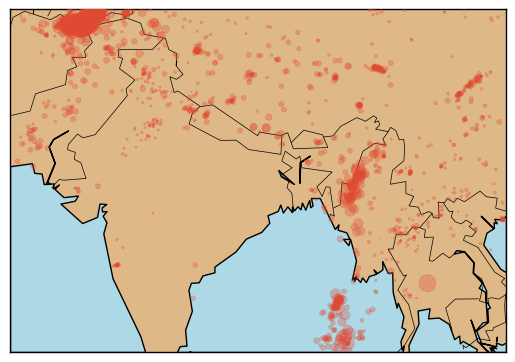

In [14]:


import pandas as pd  # import pandas

# Assuming 'df' is your DataFrame containing earthquake data:
train_test_ratio = .8
train_size = int(df.shape[0] * train_test_ratio)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
cross_val_size = test_data.shape[0]//2
cross_val_data = test_data.iloc[:cross_val_size]
test_data = test_data.iloc[cross_val_size:]

# Now you can call the function:
plot_earthquakes(cross_val_data)

<ipython-input-15-cdee4e586aec>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m.scatter(x, y, s = data['Mag']*data['Depth km']*0.1, marker='o', alpha=0.3, zorder=10, cmap = 'coolwarm')


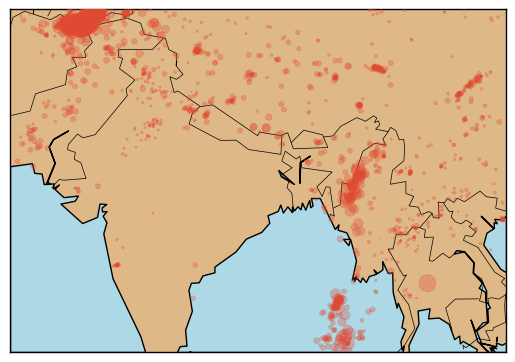

In [15]:
def plot_earthquakes(data):
    m = Basemap(projection='mill',llcrnrlat=9.800,urcrnrlat=37.720, llcrnrlon=64.510,urcrnrlon=107.580,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    m.drawmapboundary(fill_color='lightblue')
    x, y= m(list(data['Lon']), list(data['Lat']))
    m.scatter(x, y, s = data['Mag']*data['Depth km']*0.1, marker='o', alpha=0.3, zorder=10, cmap = 'coolwarm')
plot_earthquakes(cross_val_data)